# Math 450 Homework 3
# Surveying & Differential equations modeling

## Hongshuo Wang

# Q1

In [1]:
from numpy import *
from scipy import linalg, random, integrate
from matplotlib.pyplot import *

1. Given that A(1,0), B(0,0), C(0,2), $\angle 1$ = $\angle APB$ and $\angle 2$ = $\angle BPC $, let $\alpha  = \angle PBA$ and z = Cp' where z + p'A = $\sqrt{5}$


<img src="hw3.1.jpg" alt="Drawing" style="width: 1000px;"/>

let t = PA and s = Cp

$ s = \frac{2sin(\frac{\pi}{2}-\angle \alpha)}{sin\angle 2} = \frac{2cos(\alpha)}{sin\angle2}\\ t = \frac{sin( \alpha)}{sin\angle 1}$


In triangle CAP

$\frac{s}{sin\angle pi-\alpha-A} = \frac{z}{sin\angle2}$

$\frac{\sqrt{5}-z}{sin\angle 1} = \frac{t}{sin(\alpha + A)}$

plugging into t and equation

$\frac{2cos\alpha}{sin\angle 2} = \frac{z sin(\alpha + A)}{sin \angle 2}$

$\frac{(\sqrt{5}-z)sin(\alpha+A)}{sin\angle 1}=\frac{\alpha}{sin\angle 1}$



Simplifying equations, we will get:

$2cos(\alpha) = zcos(\alpha + A)\\sin(\alpha)=\sqrt{5}-zsin(\alpha+A)$

Solve for nonlinear equation using scipy.optimze.fsolve

In [2]:
A = arctan(2)
A

1.1071487177940904

In [3]:
deg2rad(90)

1.5707963267948966

In [4]:
from scipy.optimize import fsolve
from math import exp

def equations(vars):
    a, z = vars
    eq1 = 2*cos(a) - z*sin(a+A)
    eq2 = sin(a) - sqrt(5) + z*sin(A+a)
    return [eq1, eq2]

a, z =  fsolve(equations, (1, 1))

print(a,z)
print(rad2deg(a))

0.46364761550988487 1.7888543761779347
26.56505155002073


In [5]:
angel_1 = 0.1798
angel_2 = 0.3393

In [6]:
s = (2*sin(pi/2.0-a))/(sin(0.3393))
t = sin(a)/(sin(0.1798))
print(f's = {s} \n t = {t} ')

s = 5.374726011542789 
 t = 2.500735874800777 


In [7]:
angel_cap = s*sin(angel_1 + angel_2)/sqrt(5)
angel_pAg = pi - angel_cap - A
print(f'angel CAP = {angel_cap}')
print(f'angel pAg = {angel_pAg}')
y = (sin(angel_pAg) * t)/sin(pi/2)
print(f'y = {y}')

angel CAP = 1.1924483897661036
angel pAg = 0.8419955460295991
y = 1.865482916213744


By the Pythagorean theorem,

In [8]:


def equations(vars):
    x,Y = vars
    eq1 = Y - y
    eq2 = Y**2 + (x-1)**2 - t**2
    return [eq1,eq2]
x, Y =  fsolve(equations, (1,1))
print(x,Y)

2.6654288951592 1.865482916213744


In [9]:
print(f'P location: ({around(x,4)},{around(y,4)})')

P location: (2.6654,1.8655)


# Q2

## a

Given that,
$z(\delta,\epsilon) = (r-\delta)e^{(\theta-\epsilon)\pi i/180}$


$e^{ti} = 1+ti-\frac{t^{2}}{2!}-i\frac{t^{3}}{3!}+\frac{t^{4}}{4!}+i\frac{t^{5}}{5!}+...=[1-\frac{t^{2}}{2!}+\frac{t^{4}}{4!}+...] + [ti-i\frac{t^{3}}{3!}+i\frac{t^{5}}{5!}+...]$

Since $\epsilon \& \delta$ are small their high order terms we can neglect that in our approximation, the final result will be
$e^{-ti} = 1 + ti$

plugging into $ t = (-\epsilon)i\pi /180$

$z(\delta,\epsilon) = (r-\delta)(1 - \frac{i\epsilon \pi}{180})e^{(\theta)\pi i/180}$

$z(\delta,\epsilon) = (r - r\frac{i\epsilon \pi}{180}- \delta + \epsilon\frac{i\epsilon \pi}{180})e^{(\theta)\pi i/180}$


Again neglecting $\epsilon \& \delta$ high order terms

$z(\delta,\epsilon) = (r - r\frac{i\epsilon \pi}{180}- \delta )e^{(\theta)\pi i/180}$

## b

Given that:

1. N 53 E 5 perches
2. S 76 E 4 perches
3. directly W 4 perches 


Translate to poler coordinate

$\theta_{1} = 53 deg, r1 = 5\\ \theta_{2} = -76 deg, r2 = 4\\ \theta_{3} = 180 deg, r3 = 4$

plugging into #a equation

In [10]:
# first term: constant, second term: delta, and last term: epsilon
def output_terms(t, r):
    t1 = cos(pi*t/180.0)
    t2 = sin(pi*t/180.0)
    t3 = (r*pi)/180.0
    real_part = [r*t1, -t1, t3*t2]
    imag_part = [r*t2, -t2, -t3*t1]
    return np.around([real_part, imag_part],4)

real_part1, imag_part1 = output_terms(53, 5)
real_part2, imag_part2 = output_terms(-76, 4)
real_part3, imag_part3 = output_terms(180, 4)

print(f"For (r1, t1), real part = {real_part1}, imag part = {imag_part1}")


For (r1, t1), real part = [ 3.0091 -0.6018  0.0697], imag part = [ 3.9932 -0.7986 -0.0525]


In [11]:
print(f"For (r1, t1), real part = {real_part1}, imag part = {imag_part1}")
print(f"For (r2, t2), real part = {real_part2}, imag part = {imag_part2}")
print(f"For (r3, t3), real part = {real_part3}, imag part = {imag_part3}")

For (r1, t1), real part = [ 3.0091 -0.6018  0.0697], imag part = [ 3.9932 -0.7986 -0.0525]
For (r2, t2), real part = [ 0.9677 -0.2419 -0.0677], imag part = [-3.8812  0.9703 -0.0169]
For (r3, t3), real part = [-4.  1.  0.], imag part = [ 0.     -0.      0.0698]


In [12]:
real_constant = real_part1[0] + real_part2[0] + real_part3[0]
imag_constant = imag_part1[0] + imag_part2[0] + imag_part3[0]
print(around(real_constant,4))
print(around(imag_constant,4))

-0.0232
0.112


real part:
$0 = -0.0232 + (-0.6018)\delta_{1} + (-0.2419)\delta_{2} + 1\delta_{3} + 0.0697\epsilon_{1} +(-0.0677)\epsilon_{2} +0\epsilon_{3} $

$0 = -0.0232 + (-0.6018)\delta_{1} + (-0.2419)\delta_{2} + 1\delta_{3} + 0.0697\epsilon_{1} +(-0.0677)\epsilon_{2}$

imaginary part:
$0 = 0.112 + (-0.7986)\delta_{1} + (-0.9703)\delta_{2} + 0\delta_{3} + (-0.0525)\epsilon_{1} +(-0.0169)\epsilon_{2} +(0.0698)\epsilon_{3} $

$0 = 0.112 + (-0.7986)\delta_{1} + (-0.9703)\delta_{2} + (-0.0525)\epsilon_{1} +(-0.0169)\epsilon_{2} +(0.0698)\epsilon_{3} $

# C

prepare A

In [13]:
from numpy import *
from scipy import linalg
r1, t1 = 5.0,53.0
r2, t2 = 4.0,-76.0
r3, t3 = 4.0,180.0

A = zeros((8,6))
A[0:6,0:6] = eye(6)
A[6,0:6] = [real_part1[1], real_part1[2], real_part2[1],real_part2[2],real_part3[1],real_part3[2]]
A[7,0:6] = [imag_part1[1], imag_part1[2], imag_part2[1],imag_part2[2],imag_part3[1],imag_part3[2]]
A

array([[ 1.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  1.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  1.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  1.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ],
       [-0.6018,  0.0697, -0.2419, -0.0677,  1.    ,  0.    ],
       [-0.7986, -0.0525,  0.9703, -0.0169, -0.    ,  0.0698]])

prepare for w

In [14]:
W = [1,float(1/40),1,float(1/40),1,float(1/40),10,10]
W = np.diag(W)
W

array([[ 1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.025,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.025,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.025,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   , 10.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   , 10.   ]])

In [15]:
WA = dot(W,A)
WA

array([[ 1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.025,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.025,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.025],
       [-6.018,  0.697, -2.419, -0.677, 10.   ,  0.   ],
       [-7.986, -0.525,  9.703, -0.169,  0.   ,  0.698]])

prepare for b

In [16]:
b = zeros((8,1))

b1 = -real_part1[0]
b2 = -imag_part1[0]
b3 = -real_part2[0]
b4 = -imag_part2[0]
b5 = -real_part3[0]
b6 = -imag_part3[0]

b[0:6,0] = [0,0,0,0,0,0]
b[6] = -real_constant
b[7] = -imag_constant

b

array([[ 0.    ],
       [ 0.    ],
       [ 0.    ],
       [ 0.    ],
       [ 0.    ],
       [ 0.    ],
       [ 0.0232],
       [-0.112 ]])

In [17]:
Wb = dot(W,b)
Wb

array([[ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.232],
       [-1.12 ]])

solve for X, using weight linear least squares

In [18]:
xbest = linalg.lstsq(WA, Wb)
xbest[0]

array([[ 6.61608253e-03],
       [ 6.22838715e-01],
       [-7.63183617e-03],
       [ 2.60772539e-01],
       [-4.17960647e-04],
       [-8.90049298e-01]])

we are using linear least squares to approximately calculate nonlinear equation, so we to transform our output into delta and epsilon

Final results:

In [19]:
print(f'delta1 = {around(xbest[0][0],3)}; epsilon = {around(xbest[0][1],3)}\n')
print(f'delta2 = {around(xbest[0][2],3)}; epsilon2 = {around(xbest[0][3],3)}\n')
print(f'delta3 = {around(xbest[0][4],3)}; epsilon3 = {around(xbest[0][5],3)}\n')

delta1 = [0.007]; epsilon = [0.623]

delta2 = [-0.008]; epsilon2 = [0.261]

delta3 = [-0.]; epsilon3 = [-0.89]



In [20]:
print("Total error \n")

print(sum(xbest[0]))

Total error 

-0.007871757402098334


# d

We are using Adrian's method which merging of least with Gaussian elimination and Newton's method; Although it's not guaranted t converge, it's still relative efficient than using the full equations.

# 3

ion
let:
1. t be the time after noon (hours).
2. a be the rate of removing snow.
3. b be the rate of falling snow.
4. y(t) be the distance the snowplow has travelled (miles).
5. x(t) be the height of the snow at time t (m).
6. T be the time before noon (hours).


Given that a, b are constant, then
1. $x' = b \Rightarrow x(t) = b(t) + c$ 
2. $x(-T) = 0 = b(-T) + c \Rightarrow c = bT$
3. $x(t) \propto \frac{c}{y'(t)}$

p.s. c is just abtr constant


Combine all together, we can get

$y'(t) = \frac{c}{bT + bt} $


Integrating both side

$y(t) = cln|T+t| + c1$

$y(1) - y(0) = (cln|1+T| + c1) - (cln|T| + c1) = 2$

$y(2) - y(1) = (cln|2+T| + c1) - (cln|T+1| + c1) = 1$


$\frac{1+T}{T} = \frac{2+T}{1+T}^{2}$

$(1+T)^{3} = T{2+T}^{2}$
$ \Rightarrow T^{2} + T - 1 = 0$


$ T \approx −1.6180 $

In [21]:
t = around(-1.6180*60)
t

-97.0

The time did snowplow start snowing: 11:23 am

# Q4

Given that x(-14.5) = 0 & x'(-14,5) = 0 $\rightarrow$ y = [y1,y2] = [y, y'] = y1(-14.5) = 0 & y2(-14.5) = 1

let y = (x, x') then y' = (x',tx) = g(t)


$$
y' = 
\begin{bmatrix}
0 & t\\
1 & 0
\end{bmatrix}
y
$$


$\rightarrow$ f(y,t) = A(t)y

$\rightarrow y(t) = e^{(\int_{0}^{t} A(s)d{s})}y(0) $


In [22]:
from scipy.integrate import solve_ivp
from scipy.special import gamma, airy
import numpy as np

#t_span => integration range
#y0 = initial solution

y1_0 = 0
y0_0 = 1
y0 = [y0_0, y1_0]
def func(t, y):
    return [t*y[1],y[0]]

t_span = [-14.5, 3]
t = np.linspace(-14.5, 3, 100) #given 100 example (n)
sol = solve_ivp(func, t_span, y0, t_eval=t)

In [23]:
print("sol.t: {}".format(sol.t))

sol.t: [-1.45000000e+01 -1.43232323e+01 -1.41464646e+01 -1.39696970e+01
 -1.37929293e+01 -1.36161616e+01 -1.34393939e+01 -1.32626263e+01
 -1.30858586e+01 -1.29090909e+01 -1.27323232e+01 -1.25555556e+01
 -1.23787879e+01 -1.22020202e+01 -1.20252525e+01 -1.18484848e+01
 -1.16717172e+01 -1.14949495e+01 -1.13181818e+01 -1.11414141e+01
 -1.09646465e+01 -1.07878788e+01 -1.06111111e+01 -1.04343434e+01
 -1.02575758e+01 -1.00808081e+01 -9.90404040e+00 -9.72727273e+00
 -9.55050505e+00 -9.37373737e+00 -9.19696970e+00 -9.02020202e+00
 -8.84343434e+00 -8.66666667e+00 -8.48989899e+00 -8.31313131e+00
 -8.13636364e+00 -7.95959596e+00 -7.78282828e+00 -7.60606061e+00
 -7.42929293e+00 -7.25252525e+00 -7.07575758e+00 -6.89898990e+00
 -6.72222222e+00 -6.54545455e+00 -6.36868687e+00 -6.19191919e+00
 -6.01515152e+00 -5.83838384e+00 -5.66161616e+00 -5.48484848e+00
 -5.30808081e+00 -5.13131313e+00 -4.95454545e+00 -4.77777778e+00
 -4.60101010e+00 -4.42424242e+00 -4.24747475e+00 -4.07070707e+00
 -3.89393939e+00 -

plot the graph

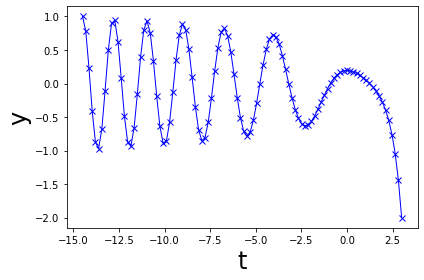

In [24]:
figure(1)
plot(sol.t, sol.y[0], 'bx-', linewidth=1)
xlabel('t', fontsize=24)
ylabel('y', fontsize=24)
tight_layout()
show()

# Q5

Suppose a hospital patient is given a 325 mg dose of acetaminophen orally, and then two
hours later is put on an intravenous drip of 10 mg per hour directly into the blood stream.
Use our 2-compartment model to predict the acetaminophen plasma concentration over the
12 hours since the oral dose, assume a blood volume of 5 liters.

Given that:
1. $x_{0}(0) = 325 mg$
2. $i_{1}(2) = 10 mg/hour\quad otherwise: \, i_{1} = 0$
3. volume of body = 5 L

Equations:
1. $x_{0}' = 0 - r_{0}x_{0} - m_{10}x_{0}$
2. $x_{1}' = m_{10}x_{0} + i_{1}(t) - r_{1}x_{1}$

Using codes found in Pharmacokinetics lecture

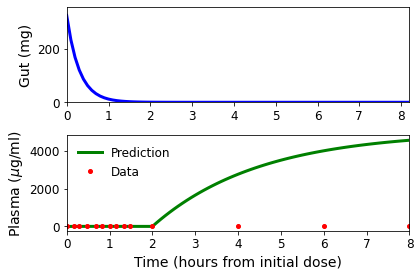

In [25]:
#!/usr/bin/env python3

"""
A two-compartment model for a single dose of acetaminophen
"""

from numpy import *
from scipy import integrate
from matplotlib.pyplot import *

rcParams.update({'font.size':12,'legend.framealpha':0.})


datafile='tylenol.csv'
data = loadtxt(datafile,delimiter=',')

r0 = 3.0
m10 = 0.3
r1 = 0.4
dose = 325. # milligrams, mg
V_blood = 5000. # milliliters, ml
mgtommg = 1000.
i_1 = 10 * 1000.0

# peak function for i1
def i(t):
    if t >= 2.0:
        return i_1
    else:
        return 0.0

def f(X, t):
    return array([ \
        -X[0]*(r0+m10), \
        X[0]*m10 - X[1]*r1 + i(t)\
        ])

x0 = array([dose, 0.])
t = arange(0, 8.25, 0.1)
x = integrate.odeint(f, x0, t)

subplot(2,1,1)
plot(t, x[:,0], 'b-', linewidth=3)
ylabel('Gut (mg)', fontsize=14)
ylim(0,dose*1.1)
xlim(0,t[-1])

subplot(2,1,2)
plot(t, x[:,1]*(mgtommg/V_blood), 'g-', linewidth=3, label='Prediction')
plot(data[:,0], data[:,1], 'ro', markersize=4, label='Data')
ylabel('Plasma ($\mu$g/ml)', fontsize=14)
xlabel('Time (hours from initial dose)', fontsize=14)
xlim(0,8)
legend()

tight_layout()
savefig('two_compartment_timeseries.png', transparent=True)
savefig('two_compartment_timeseries.pdf') # vector graphics formats are better

# Q6

## a

By reference,
https://pubmed.ncbi.nlm.nih.gov/19036410/

I will use mL, year, microg, microg/year and microg/mL in my model

## b

Assume mass conservation law, selenium will never degradation in the water except by fish and sediment
Moreover, the selenium concentration is the same everywhere in the water. 

1. i(t) is the selenium concentrations the Little Blue Run leaking into nearby water ways (microg/year)
2. r0 is the degradation rate of selenium in fish body (like r(x) in lecture)
3. r1 is the degradation rate of selenium in lake's bottom sediments
4. m10 is a rate parameter for movement from the fish (compartment 0) to the sediments (compartment 1), and has units of reciprocal time.
5. x0(t) represent the amount of selenium accumulating in the fish (microg/mL)
6. x1(t) represent the amount of selenium accumulating in the sediments (mircrog/mL)

##  c

$\frac{dx}{dt} = input\,rate - output\,rate$

For x0 (fish)

input: i

output: r0 (removal) and m10(movement)

For x1 (sediments)

input: m10 (moverment) and i

output: r1 (removal)



## d

<img src="hw3.6.jpg" alt="Drawing" style="width: 1000px;"/>

## e

1. $\frac{dx1}{dt} = -r1x1$ $\frac{dx0}{dt} = -r0x1 \,\, (By \,\, r(ax) = ar(x))$
2. $x_{0}' = i(t) - r_{0}x_{0} - m_{10}x_{0}$
3. $x_{1}' = m_{10}x_{0} + i(t) - r_{1}x_{1}$
4. $i(t) = c \,(c\, is\,the constant\, leaking\, rate)$
5. $x_{0}(0) = x_{1}(0) = 0$

# Q7

<img src="hw7.1.jpg" alt="Drawing" style="width: 1000px;"/>

Reactions:

1. $$S_{y} \xrightarrow{a1}\phi$$
2. $$S_{y} \xrightarrow{a2}S_{o}$$
3. $$S_{o} \xrightarrow{a3}\phi$$
4. $$I_{y} \xrightarrow{a4}\phi$$
5. $$I_{y} \xrightarrow{a5}I_{o}$$
6. $$I_{o} \xrightarrow{a6}\phi$$
7. $$S_{y} + I_{y} \xrightarrow{k1}2I_{y}$$
8. $$S_{y} + I_{o} \xrightarrow{k2}I_{o} + I_{y}$$
9. $$S_{o} + I_{y} \xrightarrow{k3}I_{y} + I_{o}$$
10. $$S_{o} + I_{o} \xrightarrow{k4}2I_{o}$$



Diff Eqs:

1. $$\dot{S_{y}} = -a_{1}S_{y} - a_{2}S_{y} - k_{1}S_{y}I_{y} - k_{2}S_{y}I_{o}$$
2. $$\dot{S_{o}} = -a_{3}S_{o} + a_{2}S_{o} - k_{3}S_{o}I_{y} - k_{4}S_{o}I_{o}$$
3. $$\dot{I_{y}} = -a_{4}I_{y} - a_{5}I_{y} + k_{1}S_{y}I_{y} + k_{2}S_{y}I_{o}$$
4. $$\dot{I_{o}} = -a_{6}I_{o} + a_{5}I_{y} + k_{3}S_{o}I_{y} + k_{4}S_{o}I_{y}$$


# Q8

## a

Given that dA/dt = -gB and dB/dt = -rA (g and r are constant)

Then we can solve those 2 1st order diff eqs using system

Assume y' = [dA/dt, dB/dt] and y = [A,B]
$$
y' = 
\begin{bmatrix}
0 & -g\\
-r & 0
\end{bmatrix}
y
$$




$$ det(A - \lambda y) = \lambda^{2} - rg = 0$$

Results:

$\lambda_{1} = \sqrt{rg}\\ \lambda_{2} = -\sqrt{rg}$

When $$\lambda = \lambda_{1}$$,

$$
\Longrightarrow
A-\lambda I = 
\begin{bmatrix}
-\sqrt{rg} & -g\\
-r & -\sqrt{rg}
\end{bmatrix}
y = 0
$$



Solve for y by using Gaussian Elimiation,

$$ \Longrightarrow \vec{v_{1}} = \begin{bmatrix} -\sqrt{\frac{g}{r}} \\ 1 \end{bmatrix} $$


Similarly we can get,

$$ \Longrightarrow \vec{v_{2}} = \begin{bmatrix} \sqrt{\frac{g}{r}} \\ 1 \end{bmatrix} $$

Genral solutions:

$$ \Longrightarrow y(t) = a_{1}e^{ \sqrt{rg} t}\begin{bmatrix} -\sqrt{\frac{g}{r}} \\ 1 \end{bmatrix} + a_{2}e^{-\sqrt{rg} t} \begin{bmatrix} \sqrt{\frac{g}{r}} \\ 1 \end{bmatrix} $$

Plugging into y[A,B],

Assume r and g >= 0,
A(t) = $$-a_{1}\sqrt{\frac{g}{r}} e^{ \sqrt{rg} t} + a_{2}\sqrt{\frac{g}{r}}e^{-\sqrt{rg} t}$$

B(t) = $$a_{1}e^{ \sqrt{rg} t} + a_{2}e^{-\sqrt{rg} t}$$


A(0) = $$-a_{1}\sqrt{\frac{g}{r}} + a_{2}\sqrt{\frac{g}{r}}$$

B(0) = $$a_{1} + a_{2}$$

A(t) = A(0) - gB(t)

B(t) = B(0) - rA(t)




If A win the battle,

A(t) > B(t) as t goes to infinity




$$ \Longrightarrow A(0) - g(a_{1}e^{ \sqrt{rg} t} + a_{2}e^{-\sqrt{rg} t}) > B(0) - r(-a_{1}\sqrt{\frac{g}{r}} e^{ \sqrt{rg} t} + a_{2}\sqrt{\frac{g}{r}}e^{-\sqrt{rg} t}) \,\,(a \longrightarrow \inf)$$

## b

Given that dA/dt = -gBA and dB/dt = -rA

That implies:

A(t) = A(0) -gA(t)B(t)

B(t) = B(0) - rA(t)

When A win the battle, dA/dt >= 0 

B < 0

B(0) - rA(t) <= 0



=> B(0) - r(A(0) + grA(t)) <= 0

Since A(t) = A(0) + gA(t)B(t) 
 A = A(0) + gr(A * A)

Solve for A, we got

$$A_{1} = \frac{1 + \sqrt{1 - 4grA_{0}}}{2gr}$$
$$A_{2} = \frac{1 - \sqrt{1 - 4grA_{0}}}{2gr} $$


Result:

$$ B(0) -r(A(0) + grA) \leq 0 \,\,where A = A1\,or\, A2 $$


# Q9

## a

In [26]:
from numpy import *
from pylab import loglog, show, xlabel, ylabel, savefig, text, subplot, plot
from scipy import linalg


data = loadtxt('plague_data.csv', delimiter=',',comments='#')
data

array([[ 39.,  31.],
       [ 40.,  18.],
       [ 41.,  12.],
       [ 42.,   9.],
       [ 43.,  13.],
       [ 44.,   6.],
       [ 45.,   9.],
       [ 46.,   5.],
       [ 47.,   9.],
       [ 48.,  16.],
       [ 49.,   8.],
       [ 50.,   8.],
       [ 51.,  10.],
       [  0.,  12.],
       [  1.,  16.],
       [  2.,  24.],
       [  3.,  48.],
       [  4.,  51.],
       [  5.,  92.],
       [  6., 124.],
       [  7., 178.],
       [  8., 280.],
       [  9., 387.],
       [ 10., 442.],
       [ 11., 644.],
       [ 12., 779.],
       [ 13., 702.],
       [ 14., 695.],
       [ 15., 870.],
       [ 16., 925.],
       [ 17., 802.],
       [ 18., 578.],
       [ 19., 404.],
       [ 20., 296.],
       [ 21., 162.],
       [ 22., 106.],
       [ 23.,  64.],
       [ 24.,  46.],
       [ 25.,  35.],
       [ 26.,  27.],
       [ 27.,  28.],
       [ 28.,  24.],
       [ 29.,  26.],
       [ 30.,  29.],
       [ 31.,  17.],
       [ 32.,  31.],
       [ 33.,  15.],
       [ 34.,

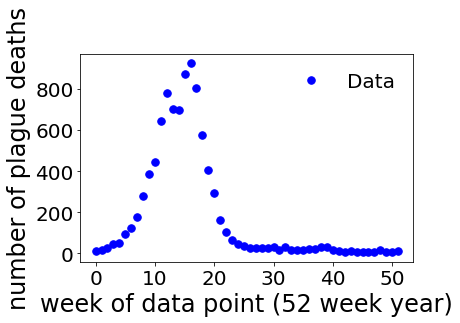

In [27]:
figure(1)
plot(data[:,0], data[:,1], 'b.', markersize=15)

xlabel('week of data point (52 week year)',fontsize=24)
ylabel('number of plague deaths',fontsize=24)
legend(['Data'],loc=1,fontsize=20)
xticks(fontsize=20)
yticks(fontsize=20)
tight_layout()
show()


## b

In [28]:
from scipy import array, linspace
from scipy import integrate
from matplotlib.pyplot import *

In [29]:
beta = 3e-5
lam = 0.01
S0 = 9000
I0 = 30

In [30]:
X0 = [9000,30]

In [31]:
def vector_field(X, t):
    # The differenti equations are
    #
    S, I = X
    return array([
        -beta*S*I,
        beta*S*I-lam*I
        ])

In [32]:
t = linspace(0., 52., 52)
X = integrate.odeint(vector_field, X0, t)
X

C:\Users\wangh_qx6\anaconda3\envs\gec\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  """Entry point for launching an IPython kernel.
C:\Users\wangh_qx6\anaconda3\envs\gec\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  import sys


array([[9.00000000e+03, 3.00000000e+01],
       [8.99054840e+03, 3.91013588e+01],
       [8.97824631e+03, 5.09470187e+01],
       [8.96224604e+03, 6.63527271e+01],
       [8.94145604e+03, 8.63685788e+01],
       [8.91447659e+03, 1.12340726e+02],
       [8.87952230e+03, 1.45985432e+02],
       [8.83433181e+03, 1.89475158e+02],
       [8.77606743e+03, 2.45533848e+02],
       [8.70121166e+03, 3.17534240e+02],
       [8.60547509e+03, 4.09582933e+02],
       [8.48374055e+03, 5.26568411e+02],
       [8.33008339e+03, 6.74132907e+02],
       [8.13792392e+03, 8.58512917e+02],
       [7.90038271e+03, 1.08617950e+03],
       [7.61090978e+03, 1.36320959e+03],
       [7.26422985e+03, 1.69434939e+03],
       [6.85756792e+03, 2.08180817e+03],
       [6.39198789e+03, 2.52395235e+03],
       [5.87351792e+03, 3.01422515e+03],
       [5.31362702e+03, 3.54072301e+03],
       [4.72867069e+03, 4.08680249e+03],
       [4.13819205e+03, 4.63281942e+03],
       [3.56238714e+03, 5.15868162e+03],
       [3.019399

In [33]:
len(X)

52

In [34]:
data[1,1]

18.0

In [35]:
betaSI = []
for i in range(len(X)):
    ind = int(data[i,0])
    betaSI.append(beta*X[ind][0]*X[ind][1])
betaSI

[24.858353039079713,
 19.664788496861167,
 15.573040929748247,
 12.34890384502143,
 9.806946757201137,
 7.8010013878115965,
 6.216184731861203,
 4.962365449842581,
 3.968898677640748,
 3.1804290017067123,
 2.553572635669071,
 2.0543078574010254,
 1.65593072104763,
 8.100000000000001,
 10.546279771173799,
 13.722446474243341,
 17.840083965569228,
 23.16782553347634,
 30.043763087004905,
 38.888426855257386,
 50.21659250328533,
 64.64464825743998,
 82.88797888194324,
 105.73967188592894,
 134.01809342735461,
 168.4674998949657,
 209.59538410675722,
 257.4370114865701,
 311.25795728492585,
 369.24430193809576,
 428.28422826106566,
 483.9921867826489,
 531.1231620504735,
 564.4224433444509,
 579.7542947757298,
 575.1448947979243,
 551.3166326617217,
 511.47525949515403,
 460.44955470959434,
 403.5548167895378,
 345.59496546244753,
 290.2558827839572,
 239.92280325373918,
 195.80621059105096,
 158.2195958794189,
 126.88375111682303,
 101.18666229427897,
 80.37392830296913,
 63.6721332855377

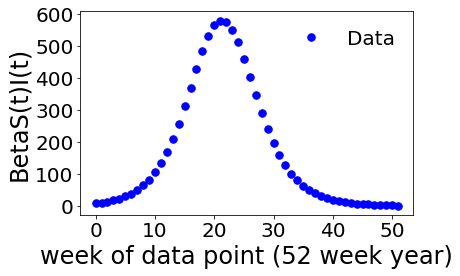

In [36]:
figure(1)
plot(data[:,0], betaSI, 'b.', markersize=15)

xlabel('week of data point (52 week year)',fontsize=24)
ylabel('BetaS(t)I(t)',fontsize=24)
legend(['Data'],loc=1,fontsize=20)
xticks(fontsize=20)
yticks(fontsize=20)
tight_layout()
show()

## c

In [37]:
abs_error = 0.0
for i in range(len(betaSI)):
    abs_error += abs(data[i,1]-betaSI[i])


print(f"Absolute Error: {abs_error}")

Absolute Error: 9385.798617076764


In [38]:
sq_error = 0.0
for i in range(len(betaSI)):
    sq_error += (data[i,1]-betaSI[i])**2


print(f"Square Error: {sq_error}")

Square Error: 3667199.6356139313


## d

In [39]:
from numpy import *
from scipy import linalg, random, integrate
from matplotlib.pyplot import *

In [40]:
from numpy import *
from pylab import loglog, show, xlabel, ylabel, savefig, text, subplot, plot
from scipy import linalg
from scipy.optimize import fmin

data = loadtxt('plague_data.csv', delimiter=',',comments='#')

In [41]:
t = linspace(0, 52, 52)

def vector_field_revised(X,t,beta,lam):
    # The differenti equations are
    #
    S, I = X
    return array([
        -beta*S*I,
        beta*S*I-lam*I
        ])

In [42]:
def e2(g):
    beta = 0
    
    beta = g[0]
    lam = g[1]
    S0 = g[2]
    I0 = g[3]
    sq_error = 0.0
    tt = [S0,I0]
    t = linspace(0, 52, 52)
    X = integrate.odeint(vector_field_revised, tt, t, args=(beta,lam))
    betaSI = []
    for i in range(52):
        ind = int(data[i,0])
        betaSI.append(beta*X[ind][0]*X[ind][1])
        
    for i in range(len(betaSI)):
        sq_error += (data[i,1]-betaSI[i])**2
        
    return sq_error

In [43]:
g0 = [3e-5,0.01,9000,30]
opt_param = fmin(e2,g0,xtol=1e-12)
opt_param

array([ 1.79658402e-05, -1.56118658e-01,  8.96703867e+03,  1.46121788e+02])

square error:

In [44]:
e2(opt_param)

78626.79374035471

In [45]:
g = opt_param
beta = g[0]
lam = g[1]
S0 = g[2]
I0 = g[3]
sq_error = 0.0
tt = [S0,I0]
t = linspace(0, 52, 52)
X = integrate.odeint(vector_field_revised, tt, t, args=(beta,lam))
betaSI = []
for i in range(52):
    ind = int(data[i,0])
    betaSI.append(beta*X[ind][0]*X[ind][1])



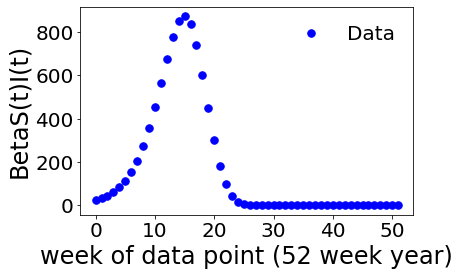

In [46]:
figure(1)
plot(data[:,0], betaSI, 'b.', markersize=15)

xlabel('week of data point (52 week year)',fontsize=24)
ylabel('BetaS(t)I(t)',fontsize=24)
legend(['Data'],loc=1,fontsize=20)
xticks(fontsize=20)
yticks(fontsize=20)
tight_layout()
show()

## e

In [47]:
opt_param[0]

1.79658401894366e-05

In [48]:
R_2 = 1- e2(opt_param)/(sum(data[:,1]**2))
print(f'R^2 = {R_2} > 0.95 (nice fit)')

R^2 = 0.9853792695993082 > 0.95 (nice fit)


# Reference

1. https://stackoverflow.com/questions/8739227/how-to-solve-a-pair-of-nonlinear-equations-using-python
2. https://stackoverflow.com/questions/4449110/python-solve-equation-for-one-variable
3. http://sites.science.oregonstate.edu/~show/docs/256-SnowPlow.pdf
4. https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html
5. https://pubmed.ncbi.nlm.nih.gov/19036410/
6. http://liyangbit.com/math/jupyter-latex/
7. https://matrixcalc.org/en/vectors.html#eigenvectors%28%7B%7B0,-g%7D,%7B-r,0%7D%7D%29
8. https://stackoverflow.com/questions/25206482/using-scipy-to-minimize-a-function-that-also-takes-non-variational-parameters
9. https://docs.scipy.org/doc/scipy-0.10.1/reference/tutorial/optimize.html